# Week 3 Day 5 afternoon: Graphics

In [1]:
%run "boaz_utils.ipynb"

# Graphics on a computer

This image is made of 1,000,000 little dots- __pixels__ ($1024\times 768$).

Each pixel has a different color.

All colors are obtained by mixing <span style="color:red">red</span>, <span style="color:green">green</span> and <span style="color:blue">blue</span>   

In [2]:
from PIL import Image
import numpy as np

def empty_screen(w=100,h=100):
    res = [ [color(255,255,255) for i in range(h)] for j in range(w)]
    return res
    
def color(red=0,green=0,blue=0):
    return (red,green,blue) 

def array_to_image(array, scale=2):
    w = len(array)
    h = len(array[0])
    data = np.zeros((h*scale, w*scale, 3), dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            for k in range(scale):
                for l in range(scale):
                    data[(h-1)*scale-(j*scale + k),i*scale+l] = array[i][j]
    img = Image.fromarray(data, 'RGB')
    img.save('my.png')
    return dsp.Image(filename='my.png')
    

    
def plot_array(array, scale=2):
    dsp.clear_output(True)
    dsp.display_png(array_to_image(array,scale))
    # sys.stdout.flush()

In [3]:
def plot_array(array, scale=2):
    dsp.clear_output(True)
    w = len(array)
    h = len(array[0])
    data = np.zeros((h*scale, w*scale, 3), dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            for k in range(scale):
                for l in range(scale):
                    data[(h-1)*scale-(j*scale + k),i*scale+l] = array[i][j]
    img = Image.fromarray(data, 'RGB')
    display(img) # ,Image.LANCZOS)
    return None

In [4]:
def RGB(red,green,blue):
    s = empty_screen(100,100)
    for i in range(len(s)):
        for j in range(len(s[i])):
            s[i][j] = color(red,green,blue)
    return array_to_image(s)

In [5]:
from ipywidgets import interact,interactive, fixed, Box
import ipywidgets as widgets

In [6]:
import IPython.display as dsp

In [7]:
def demo_RGB():
    interact(RGB, red=widgets.IntSlider(min=0,max=255,step=5,value=255),
        green=widgets.IntSlider(min=0,max=255,step=5,value=0),
         blue=widgets.IntSlider(min=0,max=255,step=5,value=0))

In [8]:
demo_RGB()

interactive(children=(IntSlider(value=255, description='red', max=255, step=5), IntSlider(value=0, description…

```color(red,green,blue)```: just returns list of 3 numbers <br>

* ```empty_screen(height,width)```: returns a ```width``` $\times$ ```height``` array ```s``` (namely a list  of ```width``` lists, each of them is of  length ```height```). For every ```x``` between 0 and ```width``` and ```y``` between 0 and ```height```,  ```s[x][y] = color(255,255,255)```.

* ```plot_array(s)```: plots the array ```s``` on the screen where ```s[0][0]``` corresponds to the bottom left corner and ```s[width][length]``` corresponds to the top right corner.

We will now demonstrate how to use these functions:

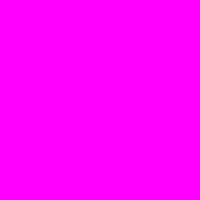

In [9]:
c = [255,0,255]
s = [[c for i in range(100)] for i in range(100)]
plot_array(s)

In [10]:
color(blue=255)

(0, 0, 255)

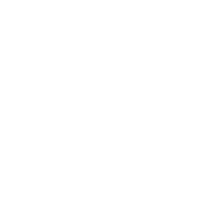

In [11]:
def empty_screen(w=100,h=100):
    white = [255,255,255]
    res = [ [white for i in range(h)] for j in range(w)]
    return res
 
s = empty_screen(100,100)
plot_array(s)

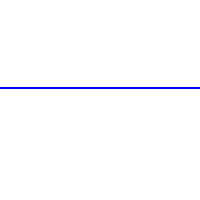

In [12]:
blue = color(red=0,blue=255,green=0)
for i in range(100):
    s[i][55] = blue
plot_array(s)

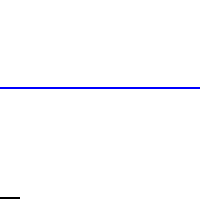

In [13]:
s[0][0] = color(0,0,0)
s[1][0] = color(0,0,0)
for j in range(2, 10):
    s[j][0] = color(0,0,0)
plot_array(s)

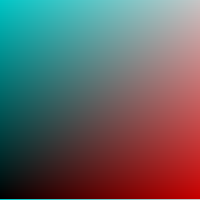

In [14]:
s = empty_screen(100,100)
for i in range(100):
    for j in range(100):
        s[i][j] = [i*2,j*2,j*2]
plot_array(s)

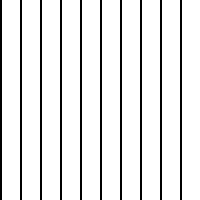

In [15]:
s = empty_screen(100,100)
for i in range(100):
    for j in range(100):
        if i % 10 != 0:
            s[i][j] = [255,255,255]
        else:
            s[i][j] = [0,0,0]
plot_array(s)

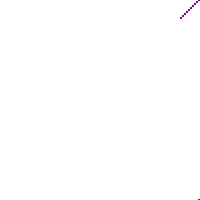

In [16]:
s = empty_screen(100,100)
white = [255,255,255]
purple = [128,0,128]
for i in range(100):
    s[i][i]= purple
    if i>=10:
        s[i-10][i-10]=white 
    plot_array(s)

In [17]:
import math
def sine(angle):
    return math.sin((angle/360.0)*2*math.pi)
def cosine(angle):
    return math.cos((angle/360.0)*2*math.pi)

In [18]:
def cannon(angle,speed,time, gravity=9.8):
    x = speed*time*cosine(angle)
    y = speed*time*sine(angle) - (gravity/2.0)*(time**2)
    return round(x,3),round(y,3)

In [19]:
cannon(90,10,1,gravity=9.8)

(0.0, 5.1)

In [20]:
cannon(45,10,200,gravity=0)

(1414.214, 1414.214)

In [21]:
cannon(30,10,100,gravity=0)

(866.025, 500.0)

In [22]:
cannon(70,10,100,gravity=0)

(342.02, 939.693)

In [23]:
cannon(45,100,10)

(707.107, 217.107)

In [24]:
cannon(45,100,20)

(1414.214, -545.786)

In [25]:
cannon(30,100,10)

(866.025, 10.0)

In [26]:
cannon(60,100,10)

(500.0, 376.025)

In [27]:
def draw_cannon(angle,speed,g=9.8):
    s = empty_screen(100,50)
    x =0
    y =0
    t=0.0
    while x<100 and y>=0 and y<50:
        s[x][y] = [0,0,255]
        (x,y) = cannon(angle,speed,t,g)
        x= int(x)
        y = int(y)
        s[x][y] = [255,0,0]
        t += 1.0/speed
        plot_array(s)
    

In [28]:
import math
def sine(angle):
    return math.sin((angle/360.0)*2*math.pi)
def cosine(angle):
    return math.cos((angle/360.0)*2*math.pi)

# (x,y) position of cannon shot at angle theta, at speed m/s, after t seconds
# with gravitational constant gravity
def cannon(theta,speed,t, gravity=9.8):
    x = speed*t*cosine(theta)
    y = speed*t*sine(theta) - (gravity/2.0)*(t**2)
    return round(x,3),round(y,3)

def draw_cannon(theta,speed,g=9.8):
    s = empty_screen(100,50)
    x =0
    y =0
    t=0.0
    while x<100 and y>=0 and y<50:
        s[x][y] = [0,0,255]
        (x,y) = cannon(theta,speed,t,g)
        x= int(x)
        y = int(y)
        s[x][y] = [255,0,0]
        t += 1.0/speed
        plot_array(s)

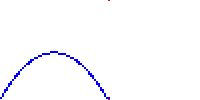

In [30]:
draw_cannon(theta=60, speed=10, g=1.62)
# 1.62 = gravitational constant of the moon
# 9.8 = gravitational constant of Earth
# higher speed or lower gravitational constant means cannon can rise higher before crashing down
# lower speed or higher gravitational constant means crashes sooner!